Toy Dataset
========

### 3.1.1 
Generate a training set of size $300$ with 2D features (X) drawn at with 150 positive and 150 negative examples as follows:
* X_{neg} $\sim$ $\mathcal{N}$([-5, -5], 25*$I_2$) and correspond to negative labels (-1)
* X_{pos} $\sim$ $\mathcal{N}$([5, 5], 25*$I_2$) and correspond to positive labels (+1)
<br />
Accordingly, $X = [X_{neg}, X_{pos}]$ is a $300\times2$ array, Y is a $300\times1$ array of values $\in \{-1, 1\}$. Here $I_2$ represent 2 x 2 identity matrix.
<p/>Draw a scatter plot of the full training dataset with the points labeled '+' or '-' according to their labels.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.io as io
import sklearn
from scipy import misc
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import scipy.io as io
import math
import sys

In [ ]:
import libsvm
from libsvm.svmutil import *

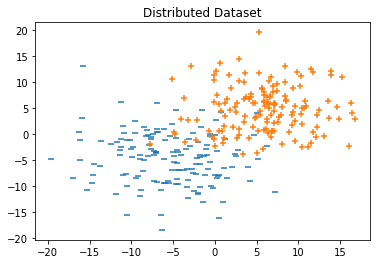

In [144]:
# Generate binary class dataset
n_samples = 300
center_1 = [-5, -5]
center_2 = [5, 5]

# Solution below:
X1 = np.random.normal(center_1, 5,(n_samples//2,2)) #Xneg
X2 = np.random.normal(center_2, 5,(n_samples//2,2)) #Xpos
X = np.concatenate((X1,X2),0)
Y = np.ones((n_samples,))
Y[:n_samples//2] = -1

# Scatter plot:
plt.figure()
plt.scatter(X1[:,0],X1[:,1],marker='_')
plt.scatter(X2[:,0],X2[:,1],marker='+')
plt.title('Distributed Dataset')
plt.show()


### 3.1.2
Randomly sample 9/10ths of the toy data as the training set, and the other 1/10th of data as the test
set.

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

### 3.1.3
Train an SVM classifier with the radial basis kernel 
$$k(x,z) = exp(- \frac{||x-z||^2_2}{\sigma^2}) $$
on the toy dataset for a reasonable value for $\sigma$.
Make $\textbf{a contour plot of decision function f}$ and $\textbf{plot the decision boundary}$, on top of the scatter plot of the data you made earlier, marking the test points in a different color than the training points (perhaps gray for the test points and black for the training points). Mark the support vectors separately (e.g. a circle around the point). Also, please report the accuracy on the training and test sets.

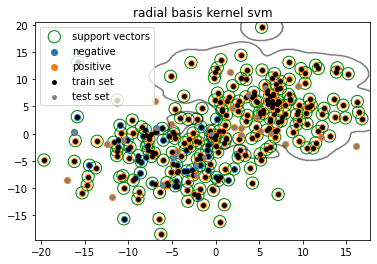

training accuracy:
Accuracy = 95.9259% (259/270) (classification)
testing accuracy:
Accuracy = 90% (27/30) (classification)


([1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0],
 (90.0, 0.4, 0.6428571428571429),
 [[0.2025181913117015],
  [-0.9158478387693041],
  [-1.0249302958448574],
  [-1.0185649817417006],
  [0.7463195337006615],
  [-0.3495654486844842],
  [-0.14633802761222628],
  [-1.0576562768080962],
  [-0.07572893445543426],
  [1.02032563441676],
  [0.4813881828796567],
  [0.9803910809836316],
  [0.9988834469486823],
  [-0.9982294746384814],
  [1.0381632203265028],
  [-1.0035334773484836],
  [0.875504298470748],
  [0.9098278371149504],
  [-0.04861559646475919],
  [0.654388770781631],
  [0.26502787232670333],
  [-0.12039752581355018],
  [-0.9619094213236259],
  [0.9883840215113957],
  [-0.9578957630165297],
  [1.0475455789947967],
  [0.510306624924629],
  [-1.0609882448784467],
  [0.5848444272755435],
  [-1.0318959112188384]])

In [146]:
# Define the SVM problem
prob = svm_problem(y_train,X_train)
param = svm_parameter('-s 0 -t 2')

# Training  the model
model = svm_train(prob, param)

support_vector = model.get_SV()

sv = np.zeros([len(support_vector), 2])
for i in range(len(support_vector)):
    sv[i][0] = support_vector[i][1]
    sv[i][1] = support_vector[i][2]

min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors
grid = np.hstack((r1,r2))

y_hat, _, _ = svm_predict([], grid, model, options="-q")
y_hat = np.array(y_hat)

zz = y_hat.reshape(xx.shape)
plt.scatter(sv.T[0], sv.T[1], label='support vectors', facecolors='none', edgecolors='g', s=150)

plt.contour(xx, yy, zz, colors='k', levels=[0.5], alpha=0.5, linestyles=['-'])


plt.scatter(X[:50, 0], X[:50, 1], label='negative')
plt.scatter(X[50:, 0], X[50:, 1], label='positive')

plt.scatter(X_train[:, 0], X_train[:, 1], label='train set', color='black', s=15)
plt.scatter(X_test[:, 0], X_test[:, 1], label='test set', color='gray', s=15)

plt.legend()
plt.title('radial basis kernel svm')
plt.show()
plt.close()

print('training accuracy:')
svm_predict(y_train, X_train, model, options="")
print('testing accuracy:')
svm_predict(y_test, X_test, model, options="")

4. Repeat the above step a few times on separate figures: make the same plot for 6 differenct $\sigma^2$ values (1, 2, 4, 8, 32, 128). Also please report the accuracy on the training and test sets. On a separate figure, plot the number of support vectors vs. $\sigma^2$ (plot the horizontal axis on a log scale).

svm rbf kernel with gamma 1.0


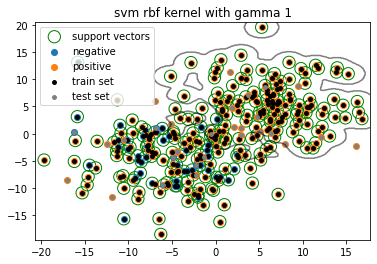

training accuracy on gamma = 1:
Accuracy = 97.037% (262/270) (classification)
testing accuracy on gamma = 1:
Accuracy = 90% (27/30) (classification)


svm rbf kernel with gamma 2.0


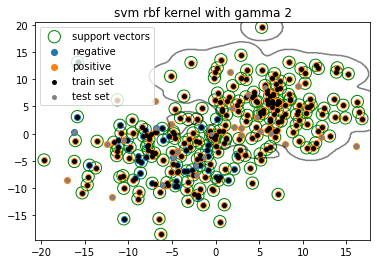

training accuracy on gamma = 0.5:
Accuracy = 95.9259% (259/270) (classification)
testing accuracy on gamma = 0.5:
Accuracy = 90% (27/30) (classification)


svm rbf kernel with gamma 4.0


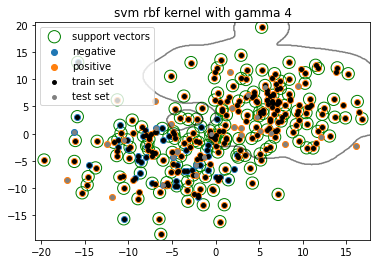

training accuracy on gamma = 0.25:
Accuracy = 94.4444% (255/270) (classification)
testing accuracy on gamma = 0.25:
Accuracy = 90% (27/30) (classification)


svm rbf kernel with gamma 8.0


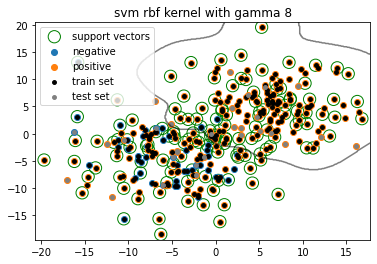

training accuracy on gamma = 0.125:
Accuracy = 93.3333% (252/270) (classification)
testing accuracy on gamma = 0.125:
Accuracy = 93.3333% (28/30) (classification)


svm rbf kernel with gamma 32.0


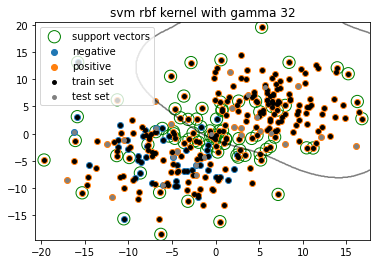

training accuracy on gamma = 0.03125:
Accuracy = 92.5926% (250/270) (classification)
testing accuracy on gamma = 0.03125:
Accuracy = 96.6667% (29/30) (classification)


svm rbf kernel with gamma 128.0


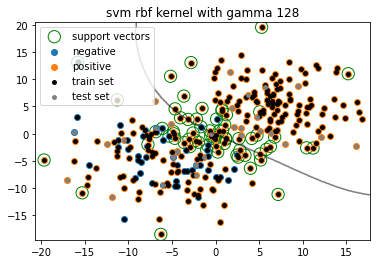

training accuracy on gamma = 0.0078125:
Accuracy = 92.963% (251/270) (classification)
testing accuracy on gamma = 0.0078125:
Accuracy = 100% (30/30) (classification)




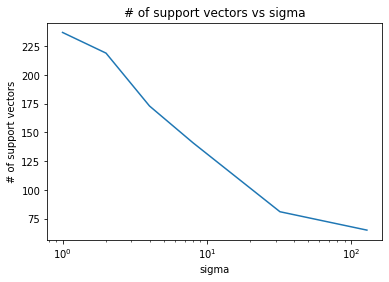

In [147]:
gamma = [1, 1/2, 1/4, 1/8, 1/32, 1/128]

num = []

for g in gamma:
    param = svm_parameter('-q -s 0 -t 2 -g ' + str(g))

    model = svm_train(prob, param)

    support_vector = model.get_SV()

    sv = np.zeros([len(support_vector), 2])
    for i in range(len(support_vector)):
        sv[i][0] = support_vector[i][1]
        sv[i][1] = support_vector[i][2]
    num.append(len(support_vector))

    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    grid = np.hstack((r1,r2))

    y_hat, _, _ = svm_predict([], grid, model, options="-q")
    y_hat = np.array(y_hat)
    zz = y_hat.reshape(xx.shape)
    plt.scatter(sv.T[0], sv.T[1], label='support vectors', facecolors='none', edgecolors='g', s=150)

    plt.contour(xx, yy, zz, colors='k', levels=[0.5], alpha=0.5, linestyles=['-'])
    print('svm rbf kernel with gamma {}'.format(1/g))
    
    plt.scatter(X[:50, 0], X[:50, 1], label='negative')
    plt.scatter(X[50:, 0], X[50:, 1], label='positive')
    
    plt.scatter(X_train[:, 0], X_train[:, 1], label='train set', color='black', s=15)
    plt.scatter(X_test[:, 0], X_test[:, 1], label='test set', color='gray', s=15)
    
    plt.legend()
    plt.title('svm rbf kernel with gamma {}'.format(int(1/g)))
    plt.savefig('svm rbf kernel with gamma {}'.format(int(1/g)))
    plt.show()
    plt.close()


    print('training accuracy on gamma = {}:'.format(g))
    svm_predict(y_train, X_train, model, options="")
    print('testing accuracy on gamma = {}:'.format(g))
    svm_predict(y_test, X_test, model, options="")
    print('\n')

plt.xscale("log")
plt.plot(1/np.array(gamma), num)
plt.xlabel('sigma')
plt.ylabel('# of support vectors')
plt.title('# of support vectors vs sigma')
plt.show()
plt.close()

5. Report any patterns you find with underfitting or overfitting, as a function of $\sigma^2$.

According to the graph of '# of support vectors vs gamma above, as the value of sigma increase, the number of support vectors extremely decrease. It is underfitting. Conversely, as the value of sigma decrease, the number of support vectors increase. This pattern shows overfitting.

6. Train an SVM classifier with a polynomial kernel of degree of 3 (you may use the default parameter from LIBSVM). Again draw the same plot as before, with the data, contour of $f$, and decision boundary, highlighting the support vectors. Also please report the accuracy on the training and test sets.

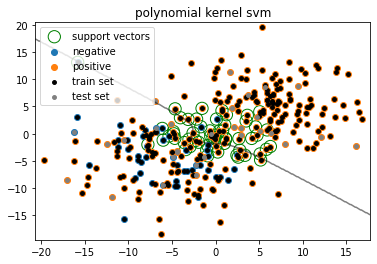

training accuracy:
Accuracy = 92.963% (251/270) (classification)
testing accuracy:
Accuracy = 93.3333% (28/30) (classification)


([-1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  -1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  -1.0,
  -1.0,
  1.0,
  -1.0,
  1.0,
  1.0,
  -1.0,
  1.0,
  -1.0],
 (93.33333333333333, 0.26666666666666666, 0.765625),
 [[-0.5842217689526602],
  [-8.09590146541708],
  [-4.83218852770403],
  [-1.009669680794535],
  [0.17268064405543146],
  [-18.99588960167824],
  [-35.46100673159084],
  [-15.42547886869034],
  [0.2006875525321794],
  [12.108196495781979],
  [23.63147560518672],
  [8.138249547116995],
  [1.8485337130784179],
  [-7.432997665102506],
  [1.072895892137477],
  [-1.2369669239899947],
  [16.07647661275108],
  [0.20156959751419315],
  [19.86233783145268],
  [0.6699706807119507],
  [2.5947650497544483],
  [-31.96196218656201],
  [-0.8744218258576881],
  [6.69374726332702],
  [-3.3016832864811105],
  [1.214315775312486],
  [0.0929381584941732],
  [-1.8564872714283414],
  [0.21235411730484505],
  [-1.4428106184811784]])

In [148]:
prob = svm_problem(y_train, X_train)
param = svm_parameter('-s 0 -t 1')

model = svm_train(prob, param)

support_vector = model.get_SV()


sv = np.zeros([len(support_vector), 2])
for i in range(len(support_vector)):
    sv[i][0] = support_vector[i][1]
    sv[i][1] = support_vector[i][2]

min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

grid = np.hstack((r1,r2))

p_label, p_acc, p_val = svm_predict([], grid, model, options="-q")
p_label = np.array(p_label)

zz = p_label.reshape(xx.shape)
plt.scatter(sv.T[0], sv.T[1], label='support vectors', facecolors='none', edgecolors='g', s=150)

plt.contour(xx, yy, zz, colors='k', levels=[0.5], alpha=0.5, linestyles=['-'])

plt.scatter(X[:50, 0], X[:50, 1], label='negative')
plt.scatter(X[50:, 0], X[50:, 1], label='positive')

plt.scatter(X_train[:, 0], X_train[:, 1], label='train set', color='black', s=15)
plt.scatter(X_test[:, 0], X_test[:, 1], label='test set', color='gray', s=15)
plt.legend()
plt.title('polynomial kernel svm')
plt.show()


print('training accuracy:')
svm_predict(y_train, X_train, model, options="")
print('testing accuracy:')
svm_predict(y_test, X_test, model, options="")


Credit Card Dataset
-----

1. Train an SVM classifier with the kernel function $k(x,z)=x^\top z$ on 9/10ths of the credit card data set. What is the accuracy of this classifier on the test data set? Show the ROC curves, and also report the AUC.

Accuracy = 83.3333% (110/132) (classification)
AUC is 0.7794117647058824


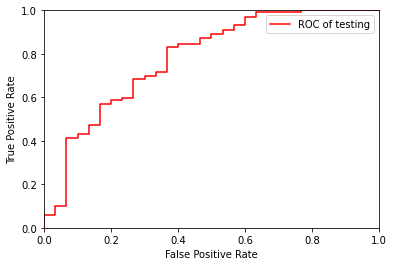

In [149]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

data = pd.read_csv("creditCard.csv")

data['feature'] = data.apply(lambda row: row.values[:-1], axis=1)

data = data[['feature', 'Class']]

updated_feature = data["feature"].to_numpy()
X = np.concatenate(updated_feature, axis=0).reshape(-1, 9)

y = data["Class"].to_numpy()

# split data to train set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

prob = svm_problem(y_train, X_train)

param = svm_parameter('-s 0 -t 0')
model = svm_train(prob, param)

p_label, p_acc, p_val = svm_predict(y_test, X_test, model)

p_val = np.array(p_val).reshape(-1)

fpr, tpr, threshold = roc_curve(y_test, p_val)
auc = auc(fpr, tpr)

print('AUC is {}'.format(auc))

plt.plot(fpr, tpr , 'r', label='ROC of testing')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = 'upper right')
plt.show()
plt.close()

2. Train an SVM classifier with the radial basis kernel 
$$k(x,z) = exp(- \frac{||x-z||^2_2}{\sigma^2}) $$
on the credit card data training set, for $\sigma^2 = 5$ and $\sigma^2 = 25$. Report the accuracy of these classifiers on the training and test data set, show the ROC curves on the training and test sets, and also report the training and test AUCs.


Accuracy = 97.2199% (1154/1187) (classification)
Accuracy = 77.2727% (102/132) (classification)
Training AUC is 0.9926689688390357
Testing AUC is 0.6243464052287583


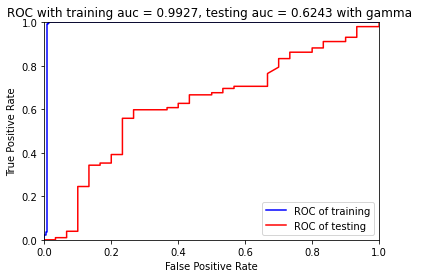

Accuracy = 87.2789% (1036/1187) (classification)
Accuracy = 78.0303% (103/132) (classification)
Training AUC is 0.9805907276334158
Testing AUC is 0.6983660130718954


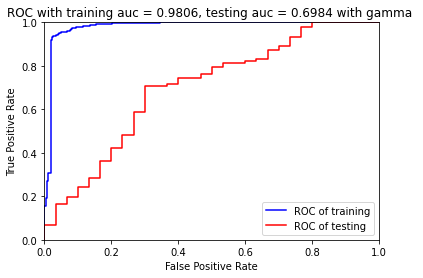

In [150]:
gamma = [1/5, 1/25]

num = []

for g in gamma:
    param = svm_parameter('-q -s 0 -t 2 -g ' + str(g))
    model = svm_train(prob, param)
    
    p_label, p_acc, p_val = svm_predict(y_train, X_train, model)
    p_val = np.array(p_val).reshape(-1)

    fpr_1, tpr_1, threshold = roc_curve(y_train, p_val)

    auc_train = sklearn.metrics.auc(fpr_1, tpr_1)

    p_label, p_acc, p_val = svm_predict(y_test, X_test, model)
    fpr_2, tpr_2, threshold = roc_curve(y_test, p_val)
    auc_test = sklearn.metrics.auc(fpr_2, tpr_2)
    
    print('Training AUC is {}'.format(auc_train))
    print('Testing AUC is {}'.format(auc_test))

    plt.title('ROC with training auc = {:.4f}, testing auc = {:.4f} with gamma '.format(auc_train, auc_test, int(1/g)))
    plt.plot(fpr_1, tpr_1 , 'b', label='ROC of training')
    plt.plot(fpr_2, tpr_2 , 'r', label='ROC of testing')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.show()
    plt.close()
    
    